# Creating Mock Weak Lensing Catalogs

##### Spencer Everett, SLAC 2015

This notebook is the first of two demos that showcase the work done on `Pangloss` during the Summer of 2015. Here we outline how to create and use the necessary shear and convergence maps, as well as how to generate and then weakly lens a catalog of background sources.

First import the necessary code modules.

In [3]:
# Utilities:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
from pangloss import *

## Convergence Maps

We have ray-traced maps of the convergence and shear in the Millennium Simulation from the work of Hilbert et al. [link to paper]. Each map is 4 x 4 degrees whose location in the field is given by `(x,y)`, where the filename of each map has the form of

`GGL_los_8_x_y_N_4096_ang_4_rays_to_plane_37_f.ext`

Let's create a new `Kappamap` object `K` for a test file located in a data directory created in the local clone of the `Pangloss` repository. Note that as it is not a FITS file, the optional parameter is set to `False`.

In [6]:
K = Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

From the filename it can be seen that we are using the (0,0) map. `Kappamap` is now a subclass of `WLMap` (weak-lensing map), which contains most of the methods used in the previous version of `Kappamap`. As the file is not a fits file, the following parameters are automatically set for any Hilbert ray-traced map:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): 'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits'

As part of the constructor, the .kappa file is also converted and saved as a .fits file in the same directory.
Convergence values in the kappa-map are obtained using the `at()` method:

In [7]:
print K.at(0,0), K.at(np.deg2rad(1), np.deg2rad(-1)), K.at(100,200,coordinate_system='image')

-0.0147446077317 -0.0049986782459 0.00617008749396


Attempting to retrieve convergence values outside of the map always results in a return of `None` (to enable error handling).

In [8]:
print K.at(0,np.pi)

None


A `Kappamap` object can also plot itself in world coordinates using the `plot()` method, where the value of the convergence is plotted in inverse greyscale.

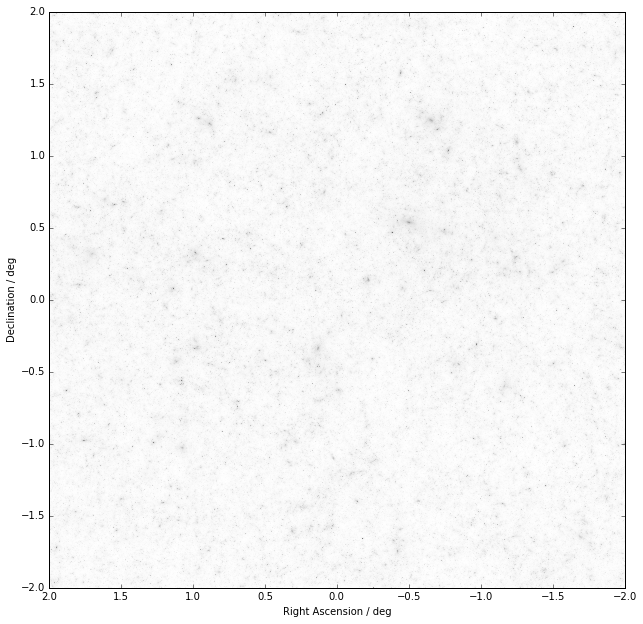

In [9]:
K.plot()

The size of the plot can be changed using the first kwarg `fig_size`, where the value is in inches. The default size is 10 in.

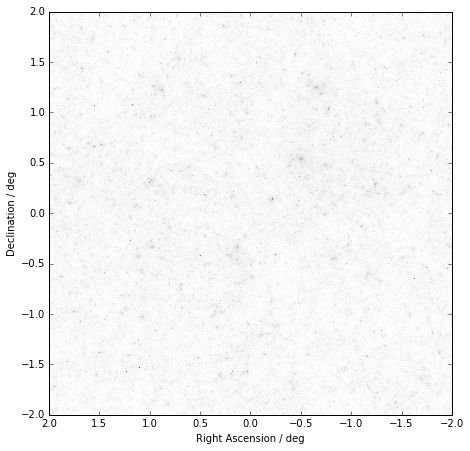

In [10]:
K.plot(fig_size=7)

The plot method can also be used to graph a subplot. Simply add a list parameter of the form:

    subplot = [xmin,xmax,ymin,ymax]

where each the subplot limits are in world coordinates:

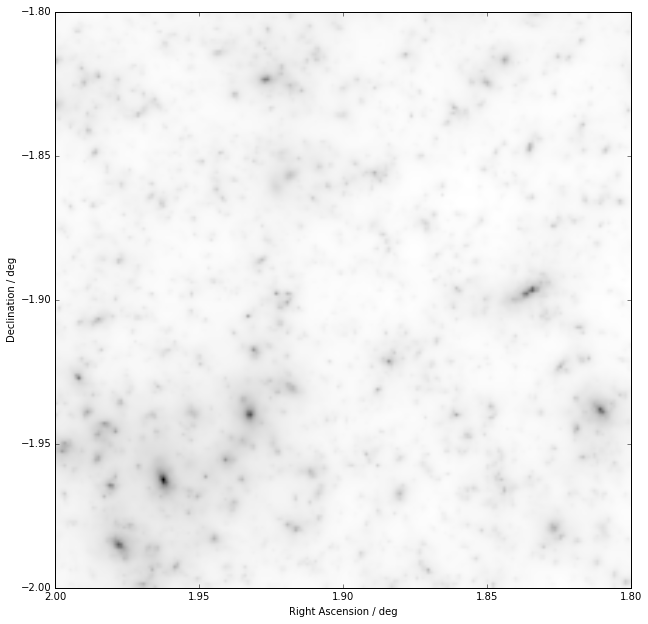

In [11]:
K.plot(subplot=[2,1.8,-2,-1.8])

Alternatively, the subplot bounds can be passed with `physical` or `image` coordinates using the kwarg `coords`. By default, `coords` is set to `world`.

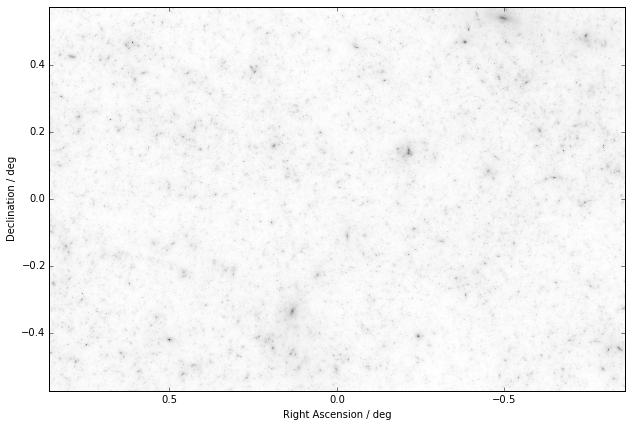

In [12]:
K.plot(subplot=[-.015,.015,-.01,.01],coords='physical')

## Shear Maps
We can also create a `Shearmap` object. Like `Kappamap`, the `Shearmap` class is a subclass of `WLMap` but requires two file inputs; one file for each component of the complex shear. The files $\textit{must}$ be passed in a list (unlike `Kappamap` files, which are automatically converted) and must be in order (first the .gamma1 file, then the .gamma2 file). As before, the optional second argument is set to `FITS = False` as the files have yet to be converted to FITS format.

In [13]:
S = Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

A `Shearmap` object is actually two separate maps: gamma1 and gamma2. Each map attribute is stored as a list, with the first and second entry corresponding to gamma1 and gamma2. For example, 

In [14]:
print S.values[0] # The shearmap values for the gamma1 map

[[  5.60115930e-03  -1.57251168e-04  -3.86622665e-03 ...,   3.13768983e-02
    3.02359760e-02   2.70190202e-02]
 [  6.39436534e-03   1.87345629e-03  -1.28266669e-03 ...,   3.53595652e-02
    3.53406854e-02   2.80189943e-02]
 [  6.40015723e-03   2.25435290e-03   2.61628738e-04 ...,   3.44255455e-02
    3.70858125e-02   1.89315286e-02]
 ..., 
 [ -2.20925122e-05  -3.09474417e-03  -5.16812131e-03 ...,  -5.15447231e-03
   -8.09114368e-04  -3.63504468e-03]
 [ -8.27380689e-04  -4.20970842e-03  -7.13164080e-03 ...,   1.02778722e-03
    2.33800570e-03   1.03648286e-03]
 [  1.34383084e-03  -9.02319269e-04  -2.03410280e-03 ...,  -1.44818809e-03
   -1.16832973e-03   2.06721551e-03]]


In [15]:
S.values[1] # The shearmap values for the gamma2 map

array([[-0.04114537, -0.04342448, -0.04252999, ...,  0.00355339,
         0.01031568,  0.01468208],
       [-0.03823771, -0.03918865, -0.03922154, ..., -0.00443153,
         0.01171172,  0.0207901 ],
       [-0.03450574, -0.03567995, -0.03604227, ..., -0.02298716,
         0.01396914,  0.03035841],
       ..., 
       [-0.00924038, -0.01350109, -0.01565584, ..., -0.00507053,
        -0.01014063, -0.01330485],
       [-0.00435786, -0.00570752, -0.00725669, ..., -0.00907261,
        -0.01085359, -0.01293556],
       [ 0.00041931,  0.00086826,  0.00176763, ..., -0.01196655,
        -0.01317145, -0.01289561]], dtype=float32)

If the files have .gamma1 and .gamma2 extensions, the attributes are set automatically in `WLMap` in the same way as `Kappamap`. A few of the important attributes set for the maps are:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): ['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits',
'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits']

The `at()` method works similarly for a `Shearmap`, but a third argument now specifies which map (gamma1 or gamma2) the method will extract from.

In [16]:
print S.at(0,0,0) # gamma1 value at (0,0)

-0.0518329935148


In [17]:
print S.at(0,0,1) # gamma2 value at (0,0)

-0.0020044472767


Note that if no third argument is passed, the method returns `None` (to avoid confusion).

In [18]:
print S.at(0,0)

None


The `plot()` method for a `Shearmap` is quite different, as shear is a spinor rather than a scalar and is usually plotted as a collection of "sticks" with sizes proportional to the magnitude of the shear.

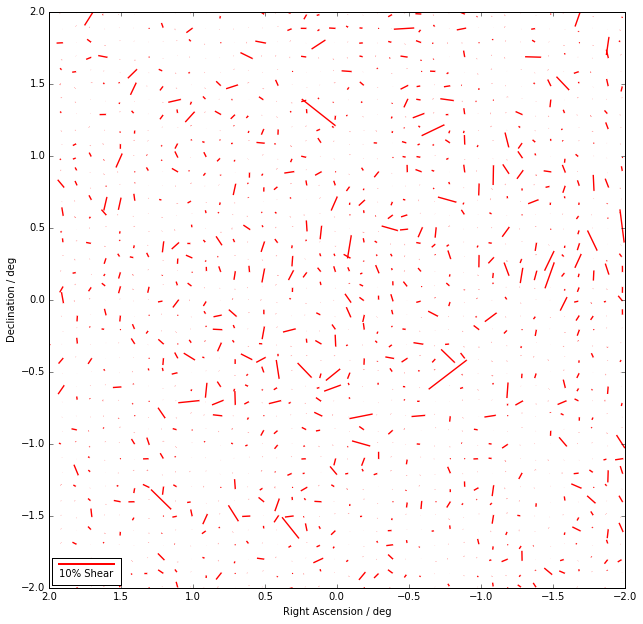

In [19]:
S.plot()

All of the previously noted `plot()` features of `Kappamap`'s apply to `Shearmap`'s. Note that the shear stick sampling for the subplot is adjusted so that the shear stick density remains the same regardless of size (40 sticks per axis).

In [20]:
np.deg2rad(1)

0.017453292519943295

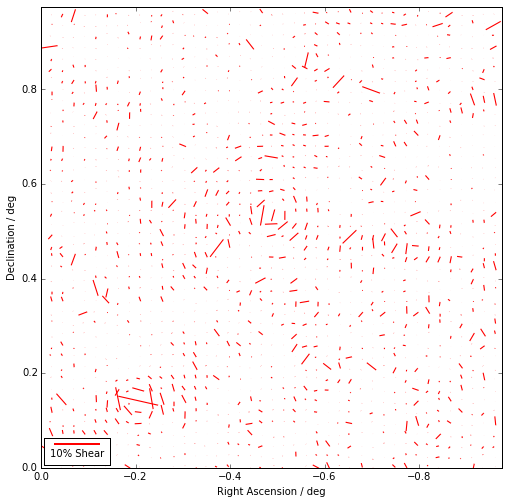

In [21]:
S.plot(fig_size=8,subplot=[0,0.017,0,0.017],coords='physical')

When the subplot is not square, the sampling of shear sticks is held constant rather than the number of sticks so that the image is not distorted:

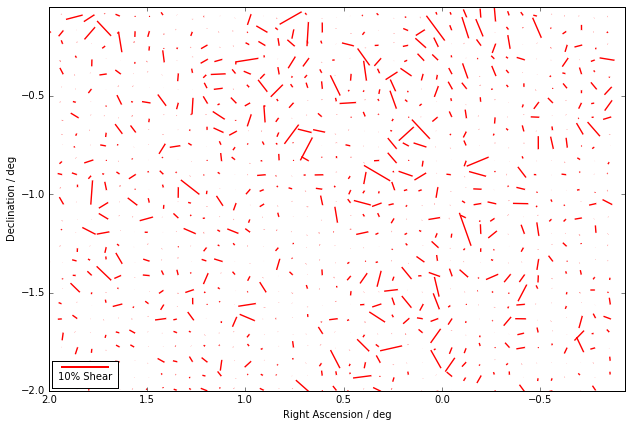

In [22]:
S.plot(subplot=[0,3000,0,2000],coords='pixel')

The plotting methods simply use the current axes, allowing simple overlays to be made:   

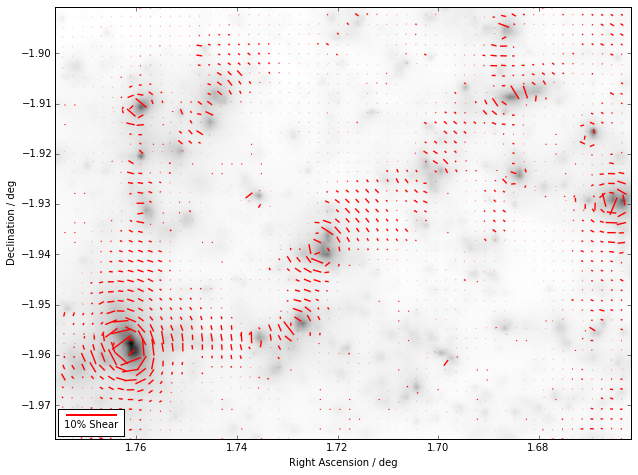

In [23]:
K.plot(subplot=[-.031,-.029,-.0345,-.033],coords='physical')
S.plot()

Note that the second map automatically adjusts its subplot to the current map. For greater flexibility, the plots will still overlay even when different subplots are given; the subplot of the `Kappamap` is always used as the shown subplot.

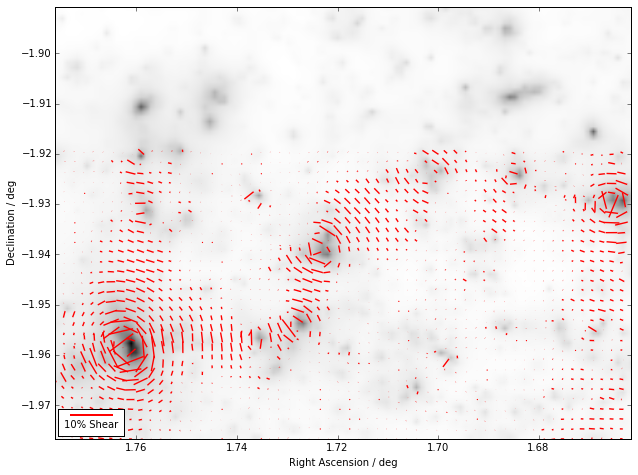

In [24]:
K.plot(subplot=[-.031,-.029,-.0345,-.033],coords='physical')
S.plot(subplot=[-.031,-.029,-.0345,-.0335],coords='physical')

## Generating Background Sources

Now that the maps have been constructed, we can create a catalog of background galaxies to be (weakly) gravitationally lensed by the maps. To do this, we construct a `BackgroundCatalog` with number density `N` (in # per arcmin^2) and `field` (corresponding to the Hilbert notation for foreground catalog field (i,j) ).

In [25]:
B = pangloss.BackgroundCatalog(N=10,field=[0,0,0,0])

A `BackgroundCatalog` contains a catalog of galaxy positions, magnitudes, masses, redshifts, and ellipticities stored in the attribute `B.galaxies`. The range of each generated attribute can specified with additional kwargs which are set to the following by default:

`mag_lim = [0,24]`

`mass_lim = [0,10**20]`

`z_lim = [1.3857,1.3857]`

`sigma_e = 0.2`

`domain = None`

where `sigma_e` is the standard deviation of the magnitude of ellipticities drawn from a normal distribution. The kwarg `domain` can be used to generate sources in the region `[xmin,xmax,ymin,ymax]`, but *must* be contained in a single `field` and the given `field` must be inputted along with the `domain`.

A `BackgroundCatalog` can also be overlayed with the ray-traced maps. First we'll create a new catalog with higher number density for clarity

In [26]:
B = pangloss.BackgroundCatalog(N=30,field=[0,0,0,0],sigma_e=0.1)

As the background sources are numerous enough to dominate the plot, the number plotted can be filtered by the kwargs `mag_lim`, `mass_lim`, and `z_lim` used in the same manner as above.

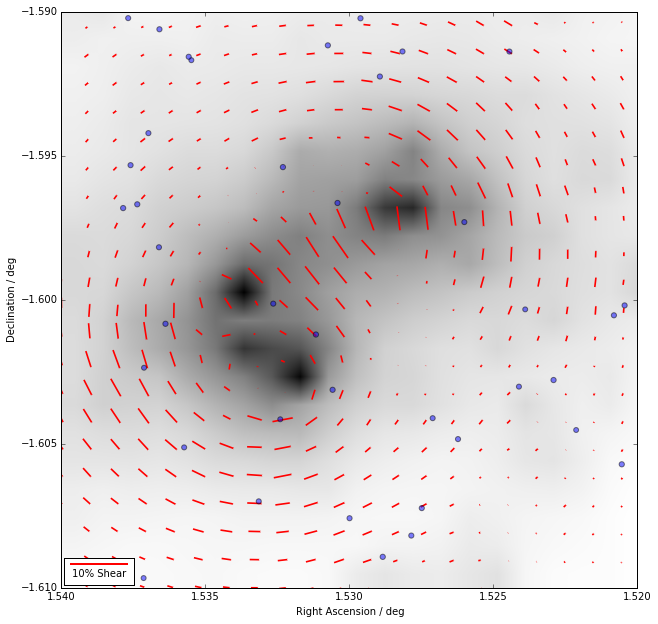

In [27]:
K.plot(fig_size=10,subplot=[1.54,1.52,-1.61,-1.59])
S.plot()
B.plot(mass_lim=[10**10,10**12])

Instead of a scatter plot, the sources can instead be plotted as ellipses

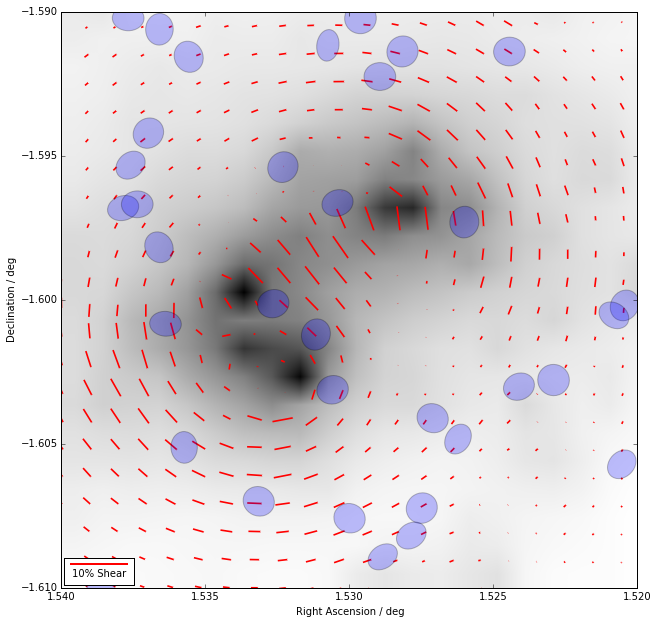

In [28]:
K.plot(fig_size=10,subplot=[1.54,1.52,-1.61,-1.59])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='ellipse')

or (most often) as ellipticity sticks:

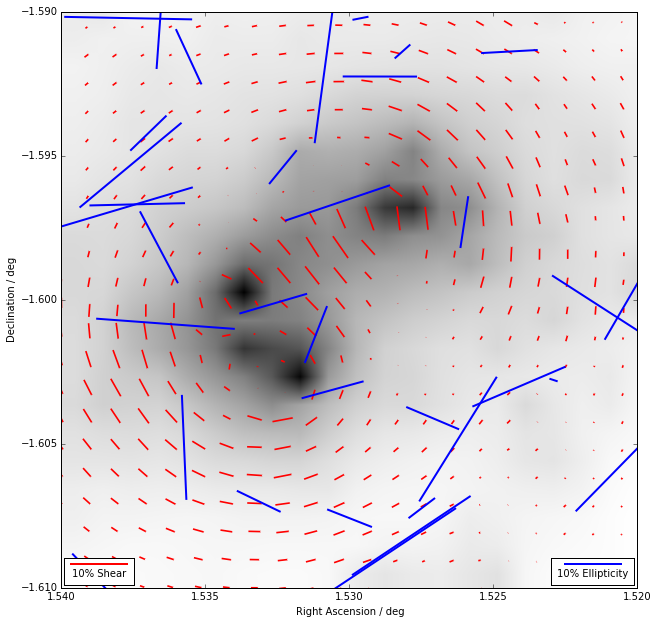

In [29]:
K.plot(fig_size=10,subplot=[1.54,1.52,-1.61,-1.59])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick')

## Lensing by Ray-Traced Maps

With a catalog of background sources created, we can use the `Kappamap`'s and `Shearmap`'s to calculate how the ellipticity of each source is lensed. Simply use the `lens_by_map()` method in `BackgroundCatalog` by passing the maps: 

In [30]:
B.lens_by_map(K,S)

The catalog now contains both the intrinsic ellipticities `e_int` and the lensed-by-map ellipticities `e`. The simplest way to compare the intrinsic and lensed ellipticites is to use the kwarg `lensed='map'` in the `plot` method of `BackgroundCatalog`. Intrinsic ellipticities are always plotted as blue, and lensed-by-map ellipticities are always plotted in green.

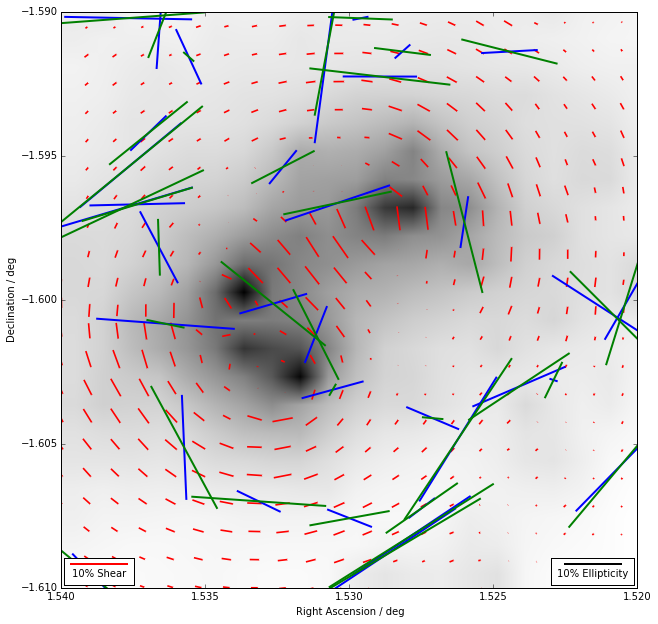

In [31]:
K.plot(fig_size=10,subplot=[1.54,1.52,-1.61,-1.59])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='map')

As expected, the source ellipticities are more aligned with the shear field after lensing. To see how this lensing prediction can be made with only foreground galaxies (and not the ray-traced maps), see [this demo].